## <span style='color:red'>Types of Unsupervised Learning<span>
** _Un Supervised Trabsformation_**
- New reprsentation of data - easier for Human or ML algorithm
- Dimensionality reduction (e.g. reduction to 2 D for easy visual representation)
- Example - FInding topic/theme in the documents, trending in election, gun control etc.

** _Clusetring Algorithm_ **
- Partition data into different groups
- Group pictures with similar faces or images

** Challenges in Unsupervised Learning **
- How to measure or evaluate whether model is doing better
- Mostly use in EXPLORATIVE analysis , best used to understand data better
- Needs to manually analyize data as part of data preprocessing in Supervised Learning case

** __Preprocessing & Scaling__ **
- Different kind of Pre Processing
- Standard Scalar (Mean = 0, Variance = 1)
- Robust Scalar (Median and Quartiles)
- MinMaxScalar (Range between 0 to 1 , all features)
- Normalizer (Eucliden distance as 1, in circle,sphere etc. , Meaning every data point is multiplied by inverse to its length




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
import mglearn1

C:\Users\Niraj Kumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
mglearn1.plots.plot_scaling()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

In [8]:
# Use Min Max Scalar using Breast data set
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Instantiate the object
scale= MinMaxScaler()

In [10]:
scale.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
X_train_scaled=scale.transform(X_train)

In [12]:
print('Scaled Version Training Shape{}'.format(X_train_scaled.shape))
print('Pre Scaled Minimum value in Training set {}'.format(np.round(X_train.min(axis=0),2)))
print('Pre Scaled Maximum value in Training set {}'.format(X_train.max(axis=0)))
print('Scaled Minimum value in Training set {}'.format(X_train_scaled.min(axis=0)))
print('Scaled Maximum value in Training set {}'.format(X_train_scaled.max(axis=0)))

Scaled Version Training Shape(426, 30)
Pre Scaled Minimum value in Training set [  6.98000000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.00000000e-02   2.00000000e-02   0.00000000e+00   0.00000000e+00
   1.10000000e-01   5.00000000e-02   1.20000000e-01   3.60000000e-01
   7.60000000e-01   6.80000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e-02   0.00000000e+00
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.00000000e-02   3.00000000e-02   0.00000000e+00   0.00000000e+00
   1.60000000e-01   6.00000000e-02]
Pre Scaled Maximum value in Training set [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+

## See the difference while running MinMaxScalar object fit with Training Set upon Testing Dataset

In [13]:
X_test_scaled= scale.transform(X_test)
print('Scaled Test Version : Minimum\n{}'.format(X_test_scaled.min(axis=0)))
print('Scaled Test Version : Maximum\n{}'.format(X_test_scaled.max(axis=0)))

Scaled Test Version : Minimum
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
Scaled Test Version : Maximum
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


## What if Training and Testing the same way

In [14]:
from sklearn.datasets import make_blobs

In [15]:
X,y=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.1)

In [17]:
scale = MinMaxScaler()

In [18]:
X_train_scaled=scale.fit(X_train).transform(X_train)

In [19]:
X_test_scaled=scale.fit(X_train).transform(X_test)

In [20]:
X_test_scaled_badly = scale.fit(X_test).transform(X_test)

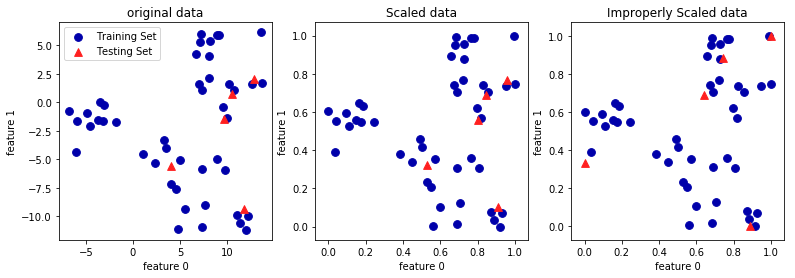

In [21]:
## Plot three scatter plot
# 1. Original data
# 2. SCaled data using Training set
# 3. Scaled data separately training with training and Testing 
%matplotlib inline
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn1.cm2(0),label='Training Set',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],c=mglearn1.cm2(1),label='Testing Set',marker='^',s=60)
axes[0].set_title('original data')
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn1.cm2(0),label='Training Set',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=mglearn1.cm2(1),label='Testing Set',marker='^',s=60)
axes[1].set_title('Scaled data')
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn1.cm2(0),label='Training Set',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],c=mglearn1.cm2(1),label='Testing Set',marker='^',s=60)
axes[2].set_title('Improperly Scaled data')
axes[0].legend(loc='best')
for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

## Compare approaches using orgina data and normalized data set - Cancer Data

In [22]:
svm = SVC(C=100)

In [23]:
# Train the model using original dataset
X_train, X_test,y_train,y_test =train_test_split(cancer.data,cancer.target,random_state=1)

In [24]:
svm.fit(X_train,y_train)
print('Test set accuracy is :{:.2f}'.format(svm.score(X_test,y_test)))

Test set accuracy is :0.62


In [25]:
# Repeat the same after Data Normalization with MinMaxScale
scaler=MinMaxScaler()

In [26]:
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.fit(X_train).transform(X_test)

In [27]:
svm.fit(X_train_scaled,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print('Testing accuracy post Normalization : {:.2f}'.format(svm.score(X_test_scaled,y_test)))

Testing accuracy post Normalization : 0.97


## Peprocessing using 0 mean and unit variance

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_train).transform(X_test)

In [32]:
svm.fit(X_train_scaled,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
print('Testing accuracy using standard scalar data pre processing :{:.2f}'.format(svm.score(X_test_scaled,y_test)))

Testing accuracy using standard scalar data pre processing :0.97


## <span style='color:red'>Dimensionality Reduction, Feature Extracction, and Mainfold Learning </span>
- Tranformation increases visibility and more informative

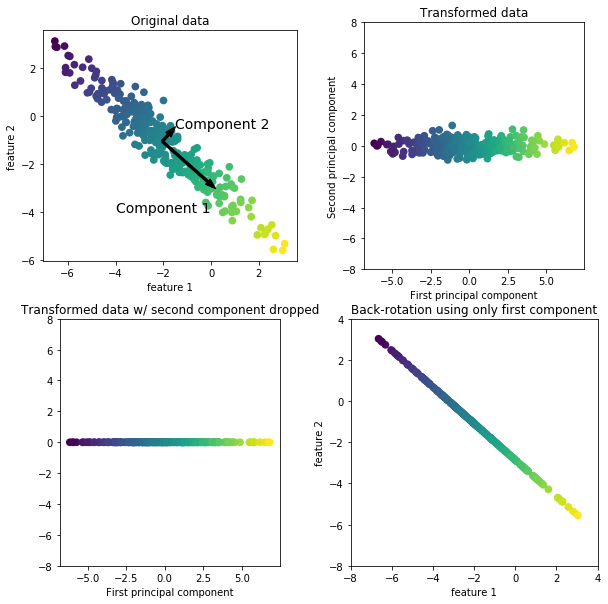

In [34]:
mglearn1.plots.plot_pca_illustration()

## Plot histogram for cancer - Malignant and Benign


In [35]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

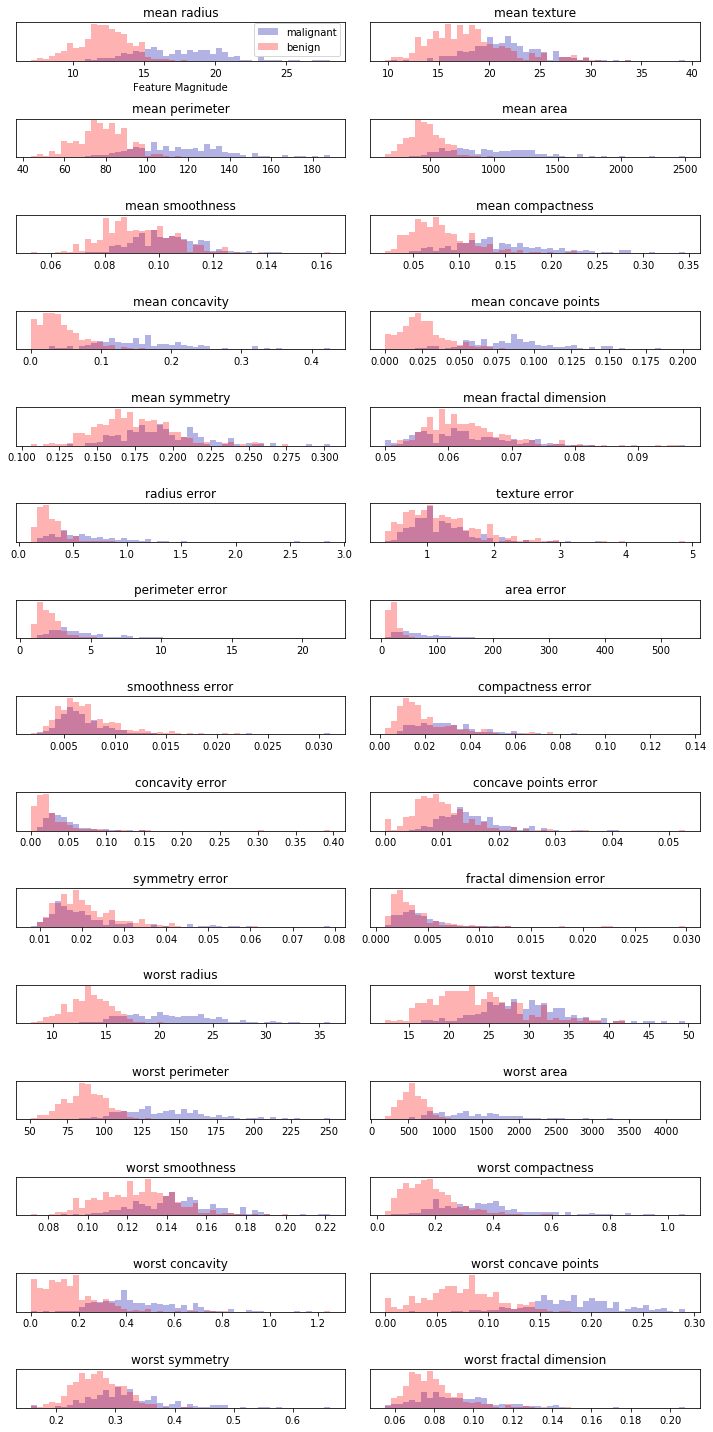

In [36]:
#Identify Malignant and Benign data points
#Parse each of the attribute and indicate Malignant and Benign
#Plot histogram for each attribute 
malignant= cancer.data[cancer.target==0]
benign= cancer.data[cancer.target==1]
fig,axes=plt.subplots(15,2,squeeze=True,figsize=(10,20))
ax= axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn1.cm3(0),alpha=0.3)
    ax[i].hist(benign[:,i],bins=bins,color='r',alpha=0.3)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature Magnitude')
ax[0].legend(['malignant','benign'],loc='best')
plt.tight_layout()


**Above picture tells the following **
- Some histograms overlap and some gives disjoint impression such as 'Smoothness Error' and ''Worst Concave Points' respectively
- However the plot doesn't say anything about how variables are interacting along with the Result
- Using PCA we can find out principal components that really matters 

In [37]:
# Scale Data (mean 0 and unit variance)
# Normalize data
# Run by PCA with 2 Principal Components
scale=StandardScaler()

In [38]:
X_scaled=scale.fit_transform(cancer.data)

In [39]:
pca = PCA(n_components=2)

In [40]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
X_pca=pca.transform(X_scaled)

In [42]:
print('original Data size :{}'.format(X_scaled.shape))
print('Reduced Data size :{}'.format(X_pca.shape))

original Data size :(569, 30)
Reduced Data size :(569, 2)


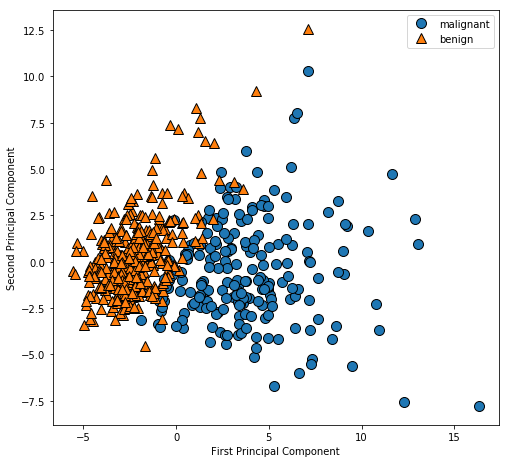

In [43]:
# Plot
%matplotlib inline
plt.figure(figsize=(8,8))
mglearn1.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.gca().set_aspect('equal')
plt.legend(cancer.target_names,loc='best')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## <span style='color:green'> How does PCA work
- First normalize data
- Derive Covariance
- Use SVD = Single Value Decomposition that returns U, S , V = U is the Rotated space (Refer Andrew Ng)
- PCA is an Unsupervised Method, and doesn't use any class information when finding the rotation
- Above picture shows even reducing the dimension we can establish the separation between classes
- Downside of PCA is that axes are not easily interpretable

In [44]:
pca.components_.shape

(2, 30)

In [45]:
# Visualize coefficient using Heat Map
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

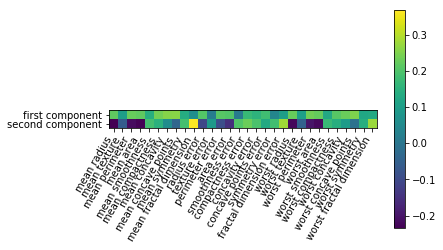

In [46]:
plt.imshow(pca.components_)
plt.yticks([0,1],['first component','second component'])
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='right')
plt.colorbar(orientation='vertical',fraction=0.15)

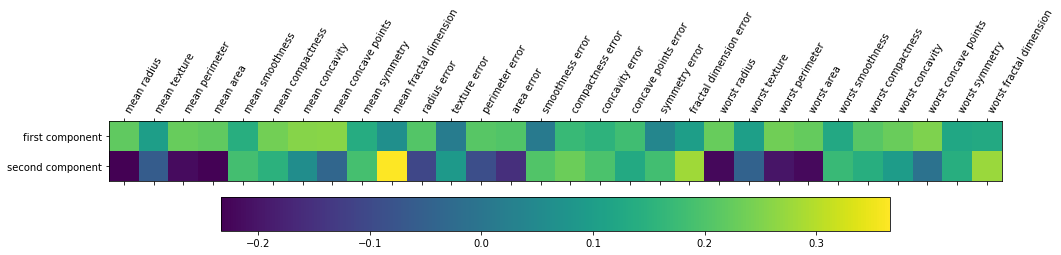

In [47]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['first component','second component'])
_=plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.colorbar(orientation='horizontal',fraction=0.3)


## <span style='color:brown'> Above picture establishes (a) 1st Component has got all variables positively correlated meaning has got strong correlation (b) 2nd component has mixed sign meaning not so strong correlation (c) mixture of variables orients axes in such a way that 1st to n components have decresing order of relationship </span>

## <span style='color:red'>Eigenfaces of feature Extraction
- Feature Extraction is another application of PCA
- PCA helps in generating better representaton of data for analysis than RAW Data available
- Example : Images analyis (Images = Pixels ==> each pixel has RGB intensity value)
- We use GRAYSCALE version of images and scale them down for faster processing

In [48]:
from sklearn.datasets import fetch_lfw_people

In [49]:
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [50]:
image_shape=people.images[0].shape

In [51]:
people.images.shape

(2936, 87, 65)

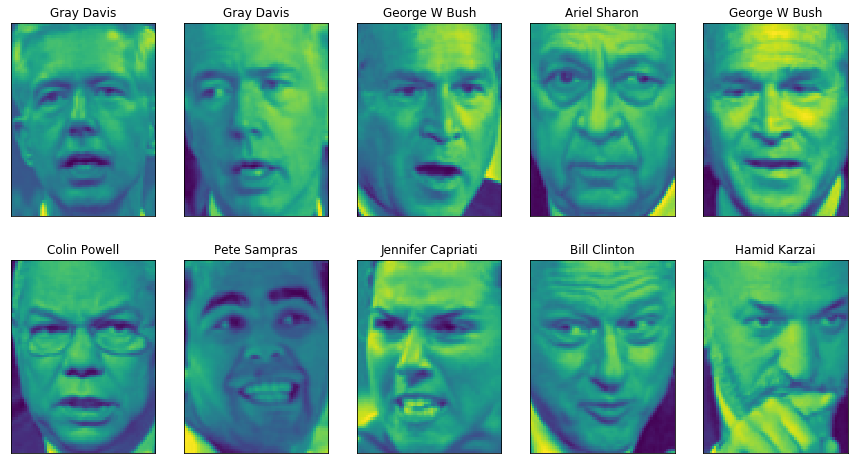

In [52]:
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image, ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [53]:
print('people.image.shape :{}'.format(people.images.shape))
print('Number of Classes: {}'.format(len(people.target_names)))

people.image.shape :(2936, 87, 65)
Number of Classes: 59


In [54]:
#people.target_names=='Atal Bihari Vajpayee'
people.target_names[np.where(people.target_names=='Atal Bihari Vajpayee')[0][0]]

'Atal Bihari Vajpayee'

In [55]:
for i, (name , counts) in enumerate(zip(people.target_names,np.bincount(people.target))):
    print('{0:25} {1:3}'.format(name,counts),end='  ')
    if (i+1)%2==0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  
Amelie Mauresmo            21  Andre Agassi               36  
Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  
Bill Clinton               29  Carlos Menem               21  
Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  
George W Bush             530  Gerhard Schroeder         109  
Gloria Macapagal Arroyo    44  Gray Davis                 26  
Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  
Jack Straw                 28  Jacques Chirac             52  
Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  
Jeremy Greenstock          24  Jiang Zemin                20  
John Ashcroft              53  John Negroponte         

<span style='color:blue'>Data is skewed , as George Bush has 530 images , much higher than others. So in order to make less skewed we will take up 50 images of each person, otherwise feature extraction would be overwhelmed by the likelyhood of George W Bush  
<span style='color:red'> Image classifier - Since there would be few images having similar faces in a class would be difficult to train. We can better use Nearest Neighbourhood classifier with 1 neighbour.  
<span style='color:brown'> <b> We will use <u>STRATIFY</u> in the parameter since it samples for Cross Validation proportional to the population </b>. Stratify is better way of data representation relative to bias and confidence. Stratification is the process that ensures that each fold retain represengtation of the data for all strata</span>

In [56]:
mask=np.zeros(people.target.shape,dtype=np.bool)

In [57]:
people.data.shape

(2936, 5655)

In [58]:
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255

In [59]:
X_people.shape

(1976, 5655)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=1)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
print('Score of train Dataset using 1-nn {:.2f}'.format(knn.score(X_train,y_train)))
print('Score of Test Dataset using 1-nn {:.2f}'.format(knn.score(X_test,y_test)))

Score of train Dataset using 1-nn 1.00
Score of Test Dataset using 1-nn 0.21


### <span style='color:red'> The test data set is going to compare with image pixel of trained model. This model will chosse that image which is closer to the test object while using 1 nearest neighbour . 21% is like get test result true in 1 occassions out of 4 to 5 times. Not Bad but we can improve the prediction using PCA where we will get model trained in transformed feature space where in we get low variance features dropped.
We can use PCA algorithm with <b> whitening </b> option. This option works like <b>StandardScalar</b> in which it principal components rescale to the same scale after the transformation

In [65]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)

In [66]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [67]:
X_train.shape,X_train_pca.shape

((1482, 5655), (1482, 100))

In [68]:
## Now use this model to classify images using KNN using 1 neighbour
knn=KNeighborsClassifier(n_neighbors=1)

In [69]:
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [70]:
print('Test accuracy using PCA model = {:.2f}'.format(knn.score(X_test_pca,y_test)))

Test accuracy using PCA model = 0.28


## <span style='color:red'> Let's analyze PCA components of the IMAGE

</span>

In [71]:
print('pca.components.shape ={}'.format(pca.components_.shape))

pca.components.shape =(100, 5655)


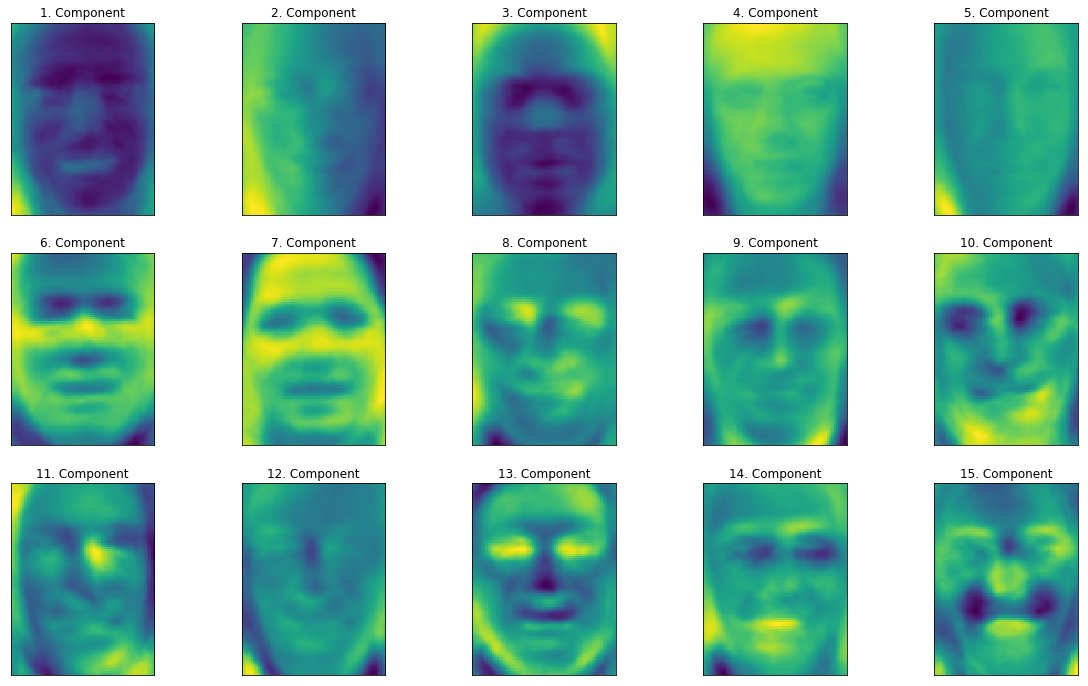

In [72]:
fig,axes=plt.subplots(3,5,figsize=(20,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title('{}. Component'.format(i+1))

### <span style='color:blue'> There is difference between how a human identifies or compares two images and how algorithm does the same. FOR image classification , Using K neighbour = 1 , we are comparing pixel wise difference and associate the image which is the  closest.  <p> <span style='color:red'>Computing differences in original PIXEL space is not the right way of measuring the similarity. We compare grayscale value between both the images at same location. This is quite different from how HUMAN would interpret the image. </span> </p> <p><span style='color:green'> If we go into PCA axes  and measure distances along the principal components should improe accuracy. </span></p> <p><u>VISUALIZE PRINCIPAL COMPONENTS:-</u>In the Above poicture we have run PCA using 100 components , we plot components and we can analyze the different aspect of images that PCA finds are relevant. While we can not understand all aspects of these components , we can guess which aspect of images some of the components are capturing. 1. 1st component mostly encode the contrast between face and background 2. 2nd Component encodes diff of lightening between left and right faces. </p> <p> While this representation is more semantic and better than the pixel , but still quite far from how HUMAN might percieve a face. <br>- PCA model==> PIXELS dependent, But aLignment of Face (eyes,chin,nose position) and lightening have strong influence on detecting simailarity between images. But HUMAN doesn't take alignment and lightening into top consideration but attributes like AGE, Color, Gender, Facial Expresssion , Hair style etc. These are the attributes hard to infer from PIXELS intensities. </br></p><br><u>ALGORITHM OFTEN INTERPRET DATA QUITE DIFFERENTLY FROM HOW HUMAN WOULD
</u></br></span>

### PCA Transformation = Rotating of data + dropping the component of LOW Variance. 
We can take weightage sum of components for each image

## ReConstruction 

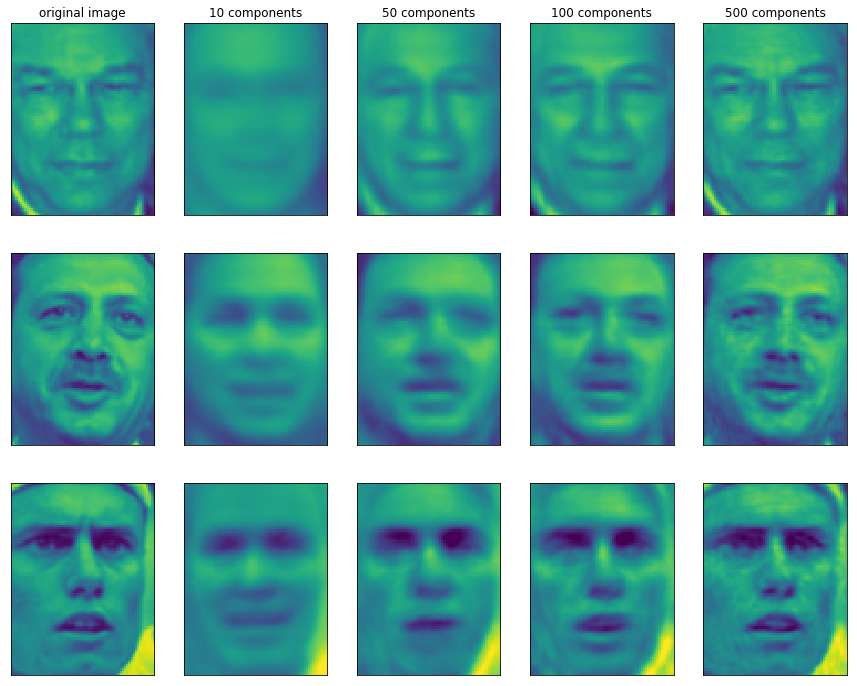

In [73]:
mglearn1.plots.plot_pca_faces(X_train,X_test,image_shape)

## <span style='color:green'> NMF - Non Negative Matrix Factorization</span>
- Unsupervised learning algorithm that aims to extracts features 
- Used for dimensionality reduction
- contrast with PCA : PCA => find out orthogonal compoents with max variance, Each data point is weighted sum of components NMF => find out components with +ve coefficients & components
- <b>The process of decomposition of data into a non-negative weighted sum is particularly for data that is created as the addition of several independent sources , such as - Music having multiple instruments , audio track having multiple conversation</b>
- NMF leads to more interpretable data as compared to PCA

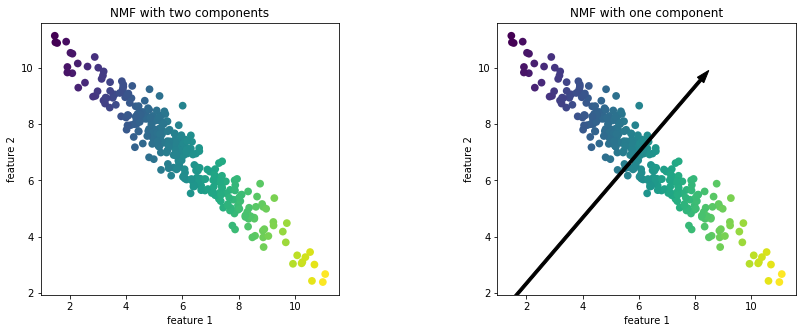

In [74]:
mglearn1.plots.plot_nmf_illustration()

- NMF => Here components are nothing but features . NMF algorithm finds out enough of features and coefficients to re Constructs data
- In the figure above , Left has got 2 features pointing at extremes should be able to reconstruct data (2 Components or 2 Features) , where as right picture has only one feature and is pointing at MEAN should explainn the data

## Application of NMF to face IMAGES
- <b> Approach</b>
- Main parameter = How many components we want to extract
- PCA finds optimum direction in terms of RECONSTRUCTION, where as NMF is usually not used for its ability to reconstruct or encode data but rather finding the PATTERN
- Lets try extracting only few components (below)

In [75]:
from sklearn.decomposition import NMF

In [76]:
nmf= NMF(n_components=15,random_state=0)

In [77]:
nmf.fit(X_train)

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=15, nls_max_iter=2000, random_state=0, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [78]:
X_train_nmf=nmf.transform(X_train)

In [79]:
X_train.shape

(1482, 5655)

In [80]:
X_train_nmf.shape

(1482, 15)

In [81]:
X_test_nmf=nmf.transform(X_test)

In [82]:
nmf.components_.shape

(15, 5655)

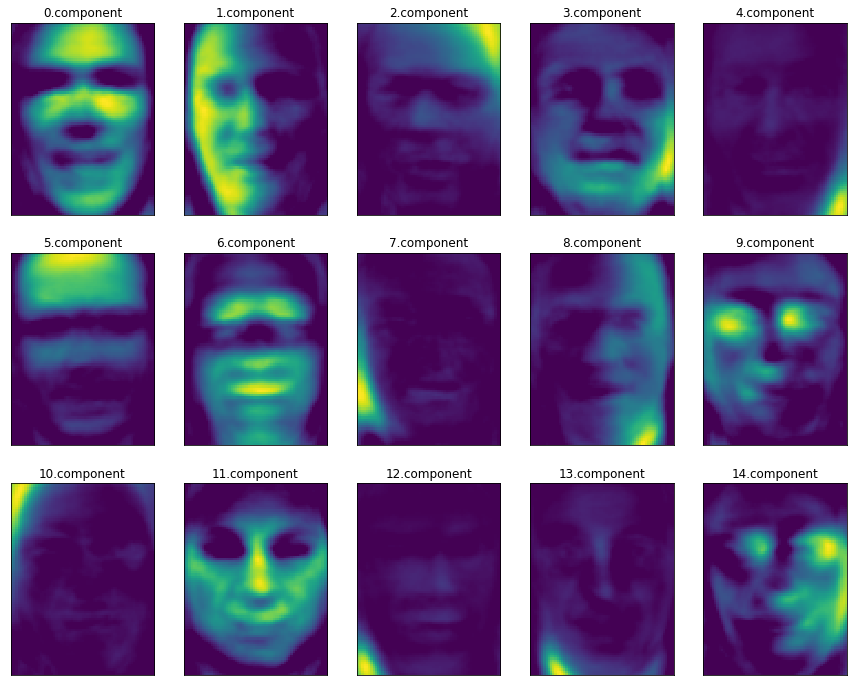

In [83]:
fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}.component'.format(i))
                      

In [84]:
# Learn argsort stuff
a= np.arange(0,50,0.5).reshape(10,10)
a[:,3]
b= np.array([10,2,1,9,19,18]).reshape(2,3)
np.argsort(b,axis=1)[:,1][::-1]


array([2, 1], dtype=int64)

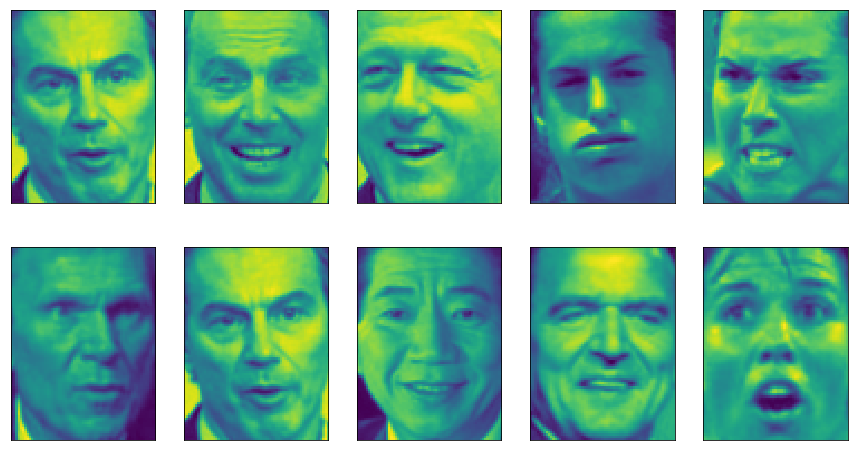

In [85]:
# Lets plot images for component 3 & 7
compn=4
inds=np.argsort(X_train_nmf)[:,compn][::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

### <span style='color:brown'>Above picture is the result of finding different aspect of face. </span>
- For ex. Component 3 looks to be giving emphasis on face looking at right. So we have taken top 10 picture having high on Component 3.

## Example of Signal = Combination of three different SIGNALS
- We want to recover the decomposition of mixed signal into the original components
- We assume there are 100 of measurment devices

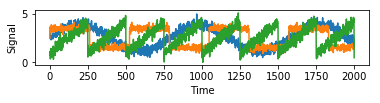

In [86]:
S=mglearn1.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [87]:
# Mix data into 1 100-D state
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
X.shape

(2000, 100)

In [88]:
nmf=NMF(n_components=3,random_state=42)

In [89]:
S_=nmf.fit_transform(X)

In [90]:
S_.shape

(2000, 3)

In [91]:
pca=PCA(n_components=3,random_state=42)

In [92]:
H=pca.fit_transform(X)

<b> Display the signal activity that was discovered by NMF and PCA</b>

In [93]:
models=[X,S,S_,H]
names = ['Observations - First Three measurements','True Sources','NMF Recovered Signals','PCA recovered Signals']

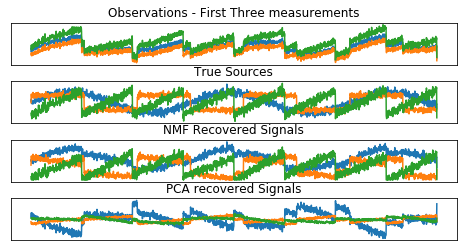

In [94]:
fig,axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':0.4},subplot_kw={'xticks':(),'yticks':()})
for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

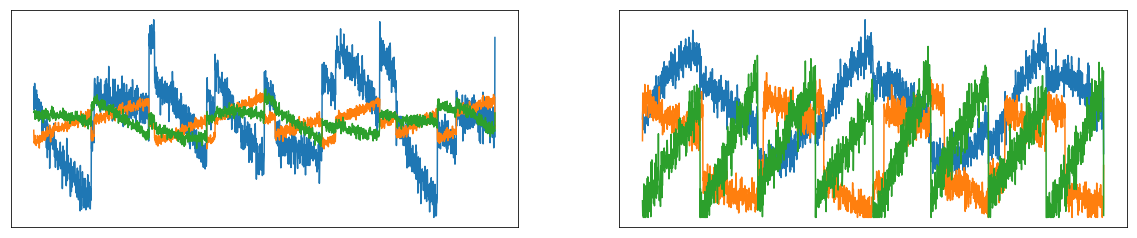

In [95]:
fig,axes= plt.subplots(1,2, figsize=(20,4),subplot_kw={'xticks':(),'yticks':()}) 
axes[0].plot(H)
axes[1].plot(S_)

## <span style='color:blue'> Note: Other algorithms that decompose data into weighted sum of components , We can learn from SCIKIT_LEARN user guide on ICA (Independent Component Analysis)  </span>

## <span style='color:red'> Manifold Learning with t-SNE 
- Read the note from note book
- PCA method involves ROTATION and droppoing of directions, might have some limitations on its usefulness but has got some advantages to VISULAIZE data
- Class of Algorithm for Visualization : Manifold Learning Algorithm ==> t-SNE
- Good for visualization , rarely used for more than 2 features
- t-SNE is used to compute new representation of training data but not used for test data (Not used for Test data transformation)
- t-SNE is used for data exploration
- t-SNE (Idea) - Used 2D of dimension and preserves distances between data points a sper the original space
- t-SNE - start with random 2D representation of datapoints , used KL (Kullbacl - Leibler) technique to preserve closeness of data points of orginal data points. Basically tries to make points those are close in orginal space , closer and far to farther.
- Emphasis is given to the closeness than the farther
## Apply t-SNE and PCA in number digits

In [96]:
from sklearn.datasets import load_digits

In [97]:
digits= load_digits()

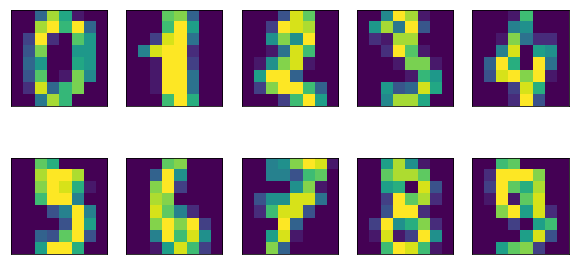

In [98]:
fig, axes = plt.subplots(2,5,figsize=(10,5), subplot_kw={'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

In [99]:
## PCA to visualize digits
pca =PCA(n_components=2)

In [100]:
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
digit_pca = pca.transform(digits.data)

In [103]:
digit_pca.shape

(1797, 2)

In [104]:
colors=['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525','#A83683','#4E655E','#853541','#3A3120','#535D8E']

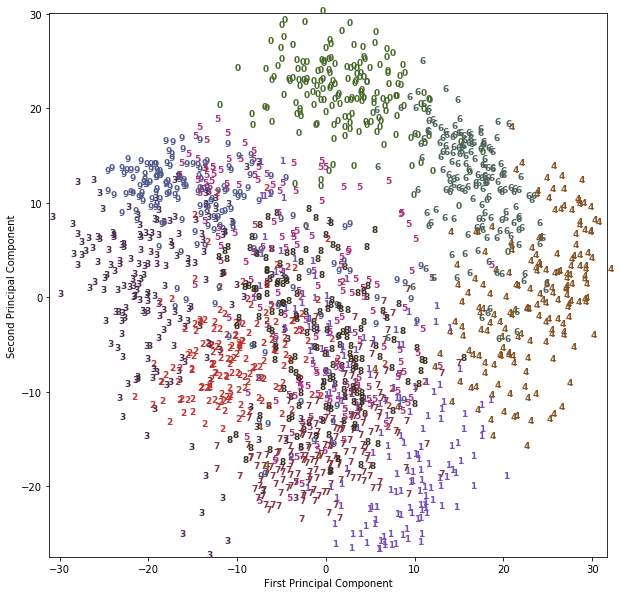

In [105]:
plt.figure(figsize=(10,10))
plt.xlim(digit_pca[:,0].min(),digit_pca[:,0].max())
plt.ylim(digit_pca[:,1].min(),digit_pca[:,1].max())
#plot the point/digit as text instead of scatter plaot
for i in range(len(digits.data)):
    plt.text(digit_pca[i,0],digit_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]],
             fontdict={'weight':'bold','size':9})
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Visualize using t-SNE

In [106]:
from sklearn.manifold import TSNE

In [107]:
tsne=TSNE(random_state=42)

In [108]:
digit_tsne = tsne.fit_transform(digits.data)

In [109]:
digit_tsne.shape

(1797, 2)

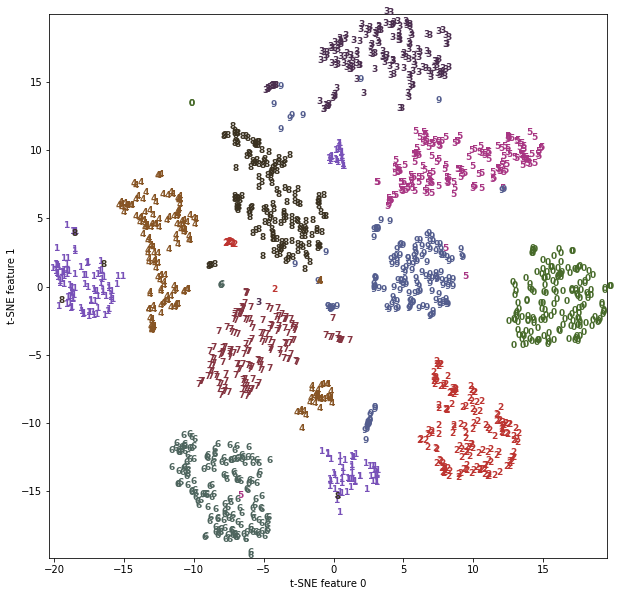

In [110]:
plt.figure(figsize=(10,10))
plt.xlim(digit_tsne[:,0].min(),digit_tsne[:,0].max())
plt.ylim(digit_tsne[:,1].min(),digit_tsne[:,1].max())
for i in range(len(digits.data)):
    plt.text(digit_tsne[i,0],digit_tsne[i,1],str(digits.target[i]),color=colors[digits.target[i]],
             fontdict={'weight':'bold','size':9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

## Note:-
- Well separated clusters. It is deriven from close proximity in the original space
- It is UNSUPERVISED learning, since this hasn't learned anything from the label
- Tuning parameters - Perplexity, learning rate, iteration etc.

# <span style='color:green'>Clustering
- Segments data into groups based upon similarity
## K-Means Clustering

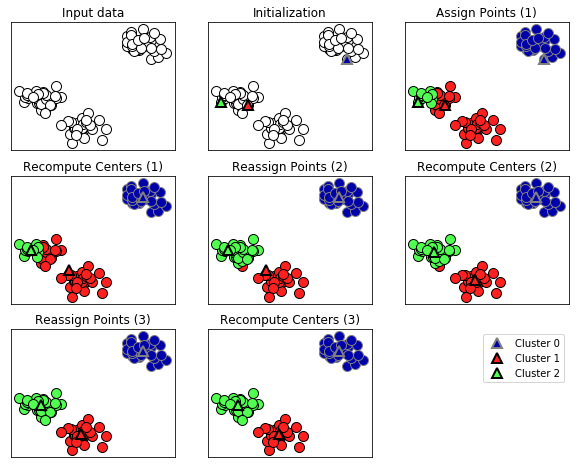

In [111]:
mglearn1.plots.plot_kmeans_algorithm()

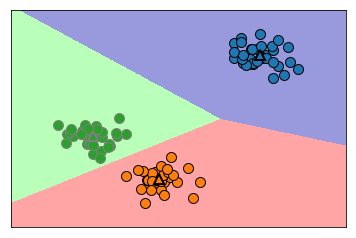

In [112]:
mglearn1.plots.plot_kmeans_boundaries()